In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

# Netflix Stock Price Prediction & Forecasting using Machine Learning in R

In simple words, "Stock" is the ownership of a small part of a company. The more stock you have the bigger the ownership is. Stock price prediction is challenging due to the dynamic and volatile nature of stock prices. We will be using machine learning algorithms to predict a company's stock price aims to forecast the future value of the company stock.

# Project Overview
* We will predict Netflix Stock Prices using machine learning algorithms in R. We will use the ARIMA model to predict the future stock prices of Netflix based on historical data.

# Understanding our Dataset
* For this project, we use Netflix's historical stock price data from 2002-01-01 to 2022-12-31.

* The dataset contains the following columns:

* NFLX.Open: The opening price of Netflix stock for a given day.
* NFLX.High: The highest price of Netflix stock on that day.
* NFLX.Low: The lowest price of Netflix stock on that day.
* NFLX.Close: The closing price of Netflix stock on that day.
* NFLX.Volume: The volume of stocks traded on that day.
* NFLX.Adjusted: The adjusted closing price after splits and dividends.
We focus on the NFLX.Close column for stock price prediction.

Dataset Used: NFLX.csv

1. Importing Required Libraries
We start by installing and loading the necessary libraries for time series analysis and forecasting.

* forecast: Used for modeling and forecasting time series data.
* quantmod: Helps fetch financial market data.
* tseries: Provides functions for time series analysis.
* ggplot2: Support visualization and handle missing data.

In [2]:
install.packages(c("forecast", "xts","tseries","ggplot2"))
library(forecast)
library(xts)
library(tseries)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's 

2. Loading the Netflix Stock Price Dataset
* We load the Netflix stock price data either from a CSV file and print the first few rows (head(df)) to verify the data structure.

In [3]:
df = read.csv("/kaggle/input/netflix-dataset/NFLX.csv")
head(df)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
3,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
4,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
5,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
6,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400


3. Checking the Dataset
* We will check the dataset's dimensions and identify any missing values to ensure the data is clean for modeling.

In [4]:
dim(df)
print(colSums(is.na(df)))

[1] 5044    7

     Date      Open      High       Low     Close Adj.Close    Volume 
        0         0         0         0         0         0         0 


The dataset has 5044 rows and 7 columns and there are no missing values in the dataset. By checking for missing values we ensure that we don't have any incomplete data, which could affect model accuracy.

4. Getting the Summary of the Data
* We take a summary of the data to get an overview of the stock's behavior, such as minimum, maximum and average values.

In [5]:
summary(df)

     Date                Open               High               Low          
 Length:5044        Min.   :  0.3779   Min.   :  0.4107   Min.   :  0.3464  
 Class :character   1st Qu.:  3.9554   1st Qu.:  4.0311   1st Qu.:  3.8854  
 Mode  :character   Median : 25.8193   Median : 26.3421   Median : 25.4550  
                    Mean   :116.4680   Mean   :118.2374   Mean   :114.5787  
                    3rd Qu.:155.7625   3rd Qu.:157.6550   3rd Qu.:153.9450  
                    Max.   :692.3500   Max.   :700.9900   Max.   :686.0900  
     Close            Adj.Close            Volume         
 Min.   :  0.3729   Min.   :  0.3729   Min.   :   285600  
 1st Qu.:  3.9586   1st Qu.:  3.9586   1st Qu.:  6168225  
 Median : 25.8029   Median : 25.8029   Median : 10591350  
 Mean   :116.4563   Mean   :116.4563   Mean   : 16530682  
 3rd Qu.:155.8700   3rd Qu.:155.8700   3rd Qu.: 19865525  
 Max.   :691.6900   Max.   :691.6900   Max.   :323414000  

The summary provides a overview of the distribution of stock prices. The mean and median help identify the average stock price, while the max and min give us the extremes of the dataset. These values show that Netflix’s stock price has fluctuated significantly over time.

5. Plotting the Data
* We visualize the stock price data using the chartSeries() function from the quantmod package to observe the trends in stock prices.

* df[, -1]: Removes the first column (which is assumed to be the date column).
* as.Date(df[, 1]): Converts the first column (the date column) into a Date format.
* xts(): Converts the data frame into an xts object, which is required by chartSeries().

* df.xts <- xts(df[, -1], order.by = as.Date(df[, 1]))

* chartSeries(df.xts, type = 'auto')

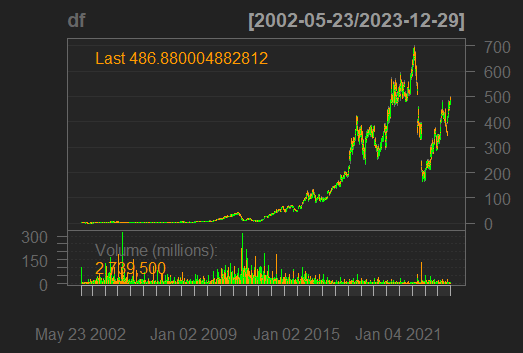
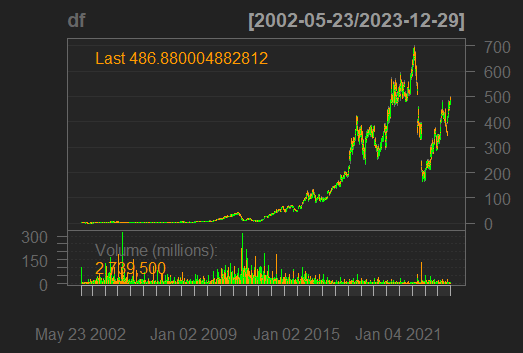

The chartSeries() function automatically generates a suitable chart (candlestick or line chart) for the stock price, which visually displays trends, patterns and fluctuations in Netflix’s stock price over time.

6. Checking for Stationarity
* We check if the data is stationary using visualizations. Non-stationary data needs to be transformed before forecasting.

Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


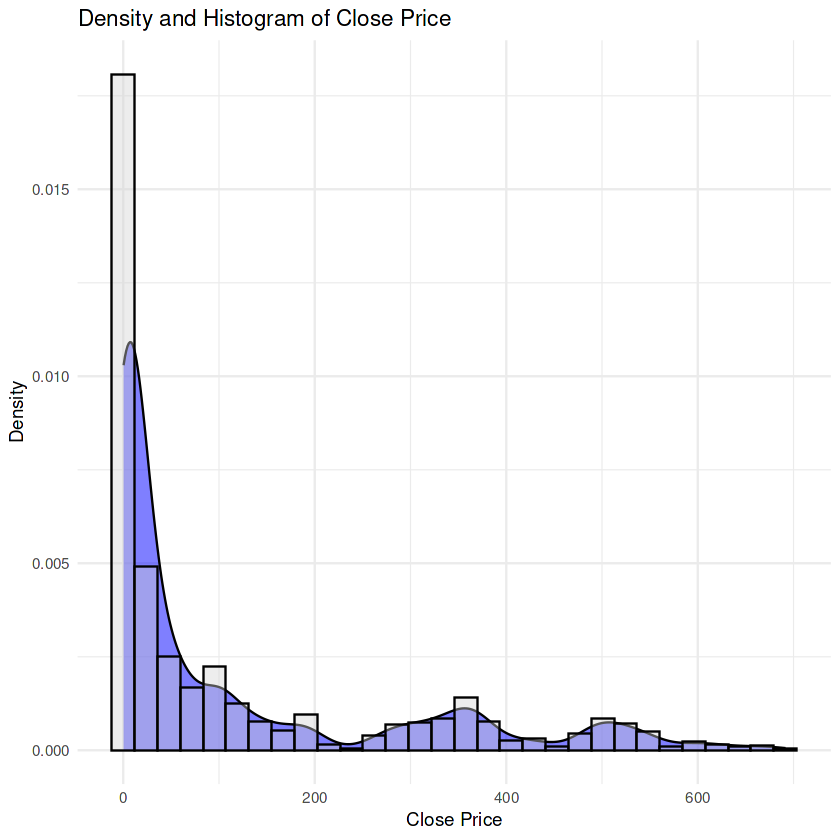

In [8]:
ggplot(df, aes(x = Close)) +
  geom_density(alpha = 0.5, fill = "blue") +
  geom_histogram(aes(y = ..density..), color = "black", fill = "lightgray", bins = 30, alpha = 0.4) +
  labs(title = "Density and Histogram of Close Price", x = "Close Price", y = "Density") +
  theme_minimal()

The histogram and density plot show that the data is non-stationary, as it is not normally distributed and shows a trend.
7. Splitting our Dataset
* We separate the Close price (the target variable) into training and testing datasets. The data is split into training and testing sets (80:20 ratio). The training set will be used to fit the model, while the testing set will validate the model's performance.

In [9]:
df.close = df[,4]
df.close.train = df.close[1:(0.8 * length(df.close))]
df.close.test = df.close[(0.8 * length(df.close)):length(df.close)]

8. Fitting the Model
We use the ARIMA model for forecasting. The auto.arima() function automatically selects the best ARIMA model by testing various combinations of the parameters.

* p: Number of AR (AutoRegressive) terms (lags of the series).
* d:Number of differencing operations needed to make the series stationary.
* q: Number of MA (Moving Average) terms (lags of the forecast errors).

In [10]:
df.close.arima = auto.arima(df.close.train, seasonal = TRUE, stepwise = TRUE, nmodels = 100, trace = TRUE, biasadj = TRUE)
summary(df.close.arima)


 Fitting models using approximations to speed things up...

 ARIMA(2,2,2)                    : Inf
 ARIMA(0,2,0)                    : 18550.28
 ARIMA(1,2,0)                    : 17647.54
 ARIMA(0,2,1)                    : Inf
 ARIMA(2,2,0)                    : 17180.86
 ARIMA(3,2,0)                    : 16887.22
 ARIMA(4,2,0)                    : 16859.23
 ARIMA(5,2,0)                    : 16713.11
 ARIMA(5,2,1)                    : Inf
 ARIMA(4,2,1)                    : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(5,2,0)                    : 16712.53

 Best model: ARIMA(5,2,0)                    



Series: df.close.train 
ARIMA(5,2,0) 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.7254  -0.5958  -0.4283  -0.2237  -0.1914
s.e.   0.0155   0.0189   0.0200   0.0190   0.0155

sigma^2 = 3.684:  log likelihood = -8350.25
AIC=16712.51   AICc=16712.53   BIC=16750.32

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE     MASE
Training set 0.00200052 1.917811 0.749739 0.01071613 2.516514 1.103833
                    ACF1
Training set -0.03349853

9. Evaluating the Model
* We check the model's performance by comparing the forecast results on the training and test data.

accuracy(df.close.forecast, df.close.test)

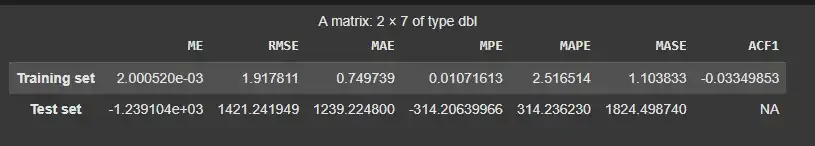
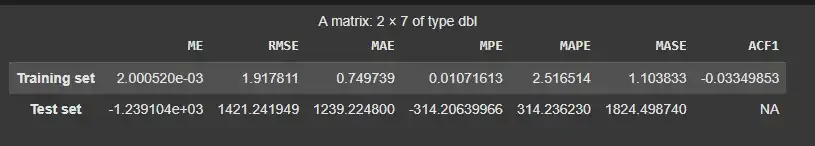

The training set has minimal errors across all metrics (ME, RMSE, MAE), suggesting the model fits well on the training data. However, the test set shows higher errors, indicating the model's poor generalization to unseen data (potential overfitting).

10. Predicting Netflix Stock Prices
* Finally, we predict the stock prices using our ARIMA model for the next 7 days, visualize the predicted stock prices and compare them with the actual test data to evaluate the model's performance.

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


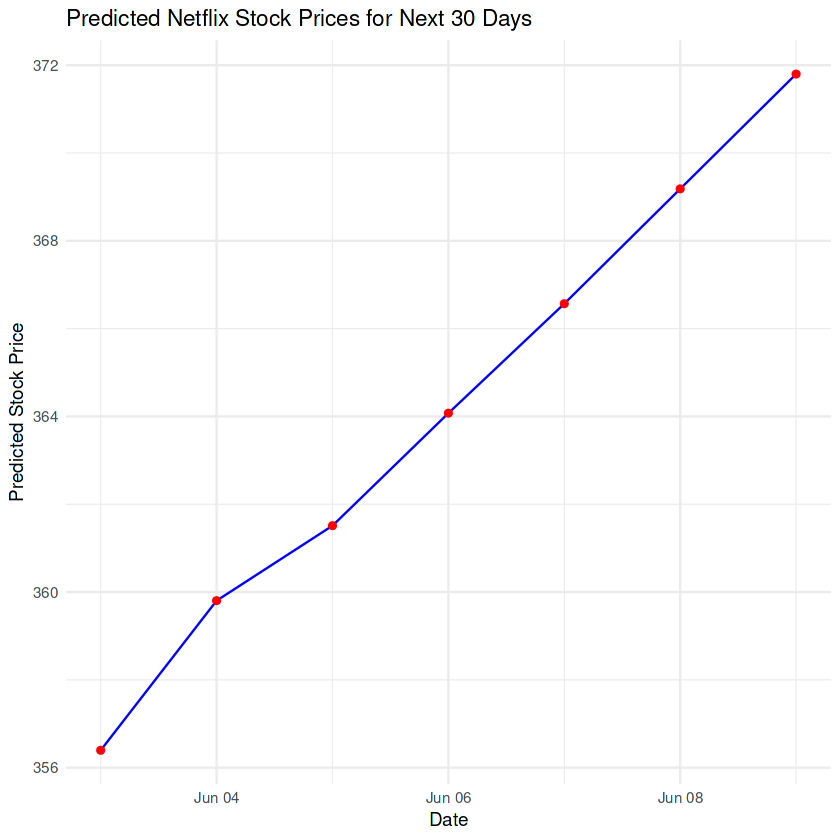

In [13]:
pred1 = predict(df.close.arima, n.ahead = 7)

forecasted_values = pred1$pred

forecast_dates = seq(from = as.Date("2022-06-03"), by = "days", length.out = 7) 
forecast_df = data.frame(Date = forecast_dates, Predicted = forecasted_values)

ggplot(forecast_df, aes(x = Date, y = Predicted)) +
  geom_line(color = "blue") +  
  geom_point(color = "red") + 
  labs(title = "Predicted Netflix Stock Prices for Next 30 Days",
       x = "Date",
       y = "Predicted Stock Price") +
  theme_minimal()

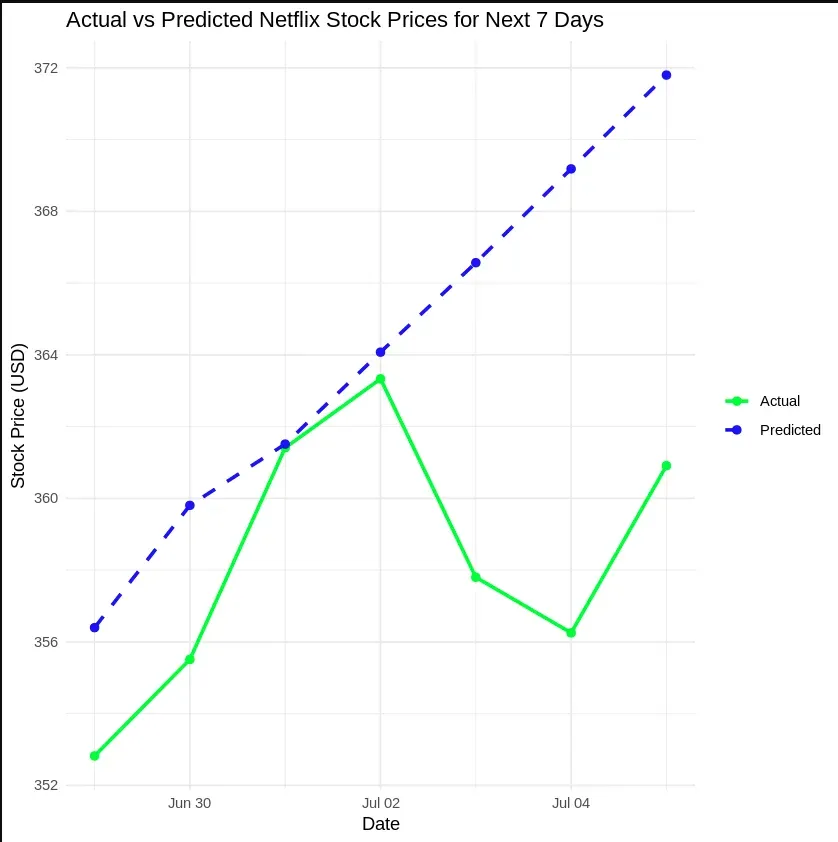
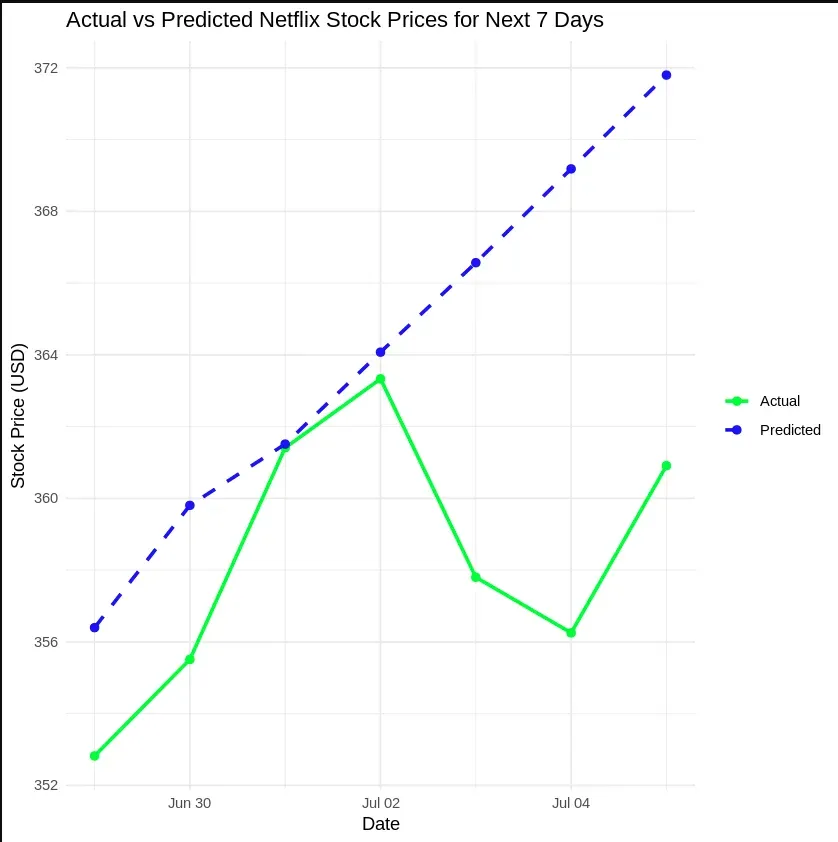

# Conclusion
* From our analysis, we concluded that predicting Netflix stock prices using the ARIMA model can provide reasonable forecasts. However, the model showed signs of overfitting, as it performed well on the training set but not on new, unseen data. This suggests that improvements such as parameter tuning or using more sophisticated models could help enhance the prediction accuracy for stock prices.
* Made by Kanishka
